# Test Dirichlet

##### @author: Anne Hermann

## Overview: 
    The initial geometry is a half / full Vialov Profil. 
    At the left side the boundary condition is a zero flux / fixed thickness and on the right side a fixed thickness. 

    Assumption:
        - the velocity at the base is equal to zero.
        - there is no basal melt


In [1]:
import SIA_faster as sia
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from vialov import vialov

#### Initialize Variables

In [2]:
n = 3           # Glens flow law
rho = 910       # kg m^-3
A = 1e-16    # a^-1 Pa^-3 
g = 9.81        # m s^-2

#### Discretization

In [3]:
# grid in x dir.
delta_x = 500
x_lim =750000        # L in Vialov Profil
x = np.arange(-x_lim,x_lim+delta_x,delta_x)

# time 
t_0=0
N=int(1e04)    # Nr. of time steps
delta_t=0.0005

#### Initialize SMB, the surface elevation, bed and boundary 

In [4]:
# SMB 
a_s = 0.3#0.03 # m/a
via = vialov(x,x_lim,a_s,n,A,rho,g)

# Surface profile and bed
surface = via  #-0.001*x**2+20 #5*np.ones(np.size(x)) -0.00005*x**2+4000
#surface[len(surface)-1]=0
bed = np.zeros(np.size(x)) #x_lim/200*np.sin(10/x_lim*x*np.pi)

# Flux boundary Condition 
# ((a,b),(c,d))
# The tupel (a,b) is the left boundary. 
# a = 0: Dirichlet (fixed head)
# a = 1: Neumann   (fixed flux)
# (c,d) is the right boundary.
boundary = np.array(((0,0),(0,0)))

#### Calculate the solution with the SIA code

In [5]:
h,v,Q,N_t = sia.solution(bed,surface,boundary,a_s,delta_x,delta_t,t_0,N,n,rho,A,g)

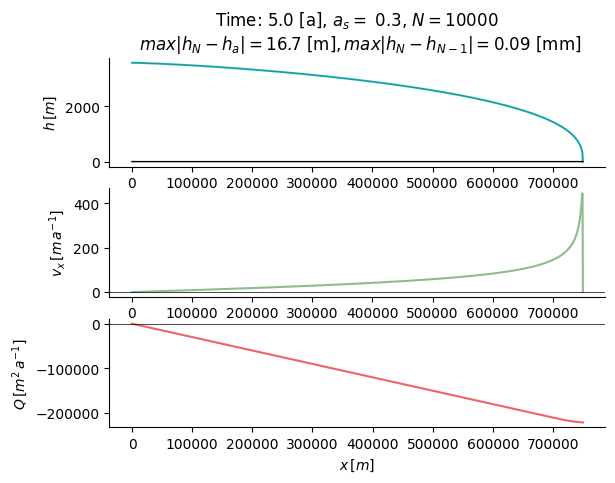

In [ ]:
fig,ax=plt.subplots(3)

colors1 = plt.cm.jet(np.linspace(0,1,N_t))
colors2 = plt.cm.jet(np.linspace(0,1,N_t))
colors3 = plt.cm.jet(np.linspace(0,1,N_t))
xQ = np.arange(x[0]+1/2*delta_x,x[len(x)-1]+1/2*delta_x,delta_x)
if boundary[0,0]==1:
    xQ=np.append(x[0]-delta_x/2,xQ)
if boundary[1,0]==1:
    xQ=np.append(xQ,x[len(x)-1]+1/2*delta_x)

ax[0].plot(x,h[len(h)-1],"-", color=(0/255,206/255,209/255))
ax[1].plot(x,v[len(v)-1],"-", color=(143/255,188/255,143/255))
ax[2].plot(xQ,Q[len(Q)-1],"-", color=(238/255,99/255,99/255))

ax[0].plot(x,via,"-",color=(.4,.4,.4),linewidth=.5)
ax[0].set(ylabel=r"$h\, [m]$", title = f"Time: {t_0+N*delta_t} [a], $a_s=$ {a_s}, $N=${N_t-1} \n $max |h_N-h_a|=${np.round(max(abs(np.array(h[len(h)-1])-np.array(via))),1)} [m],"+
           r"$\,max |h_N-h_{N-1}|$"+f"$=${np.round(max(abs(np.array(h[len(h)-1])-np.array(h[len(h)-2])))*1e03,2)} [mm]")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].plot(x,bed,"-",color="k",linewidth=1)

ax[1].set(xlabel=r"$x\,[m]$",ylabel=r"$v_x\,[m\,a^{-1}]$")
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].axhline(y=0, color='k',linewidth=.5)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].axhline(y=0, color='k',linewidth=.5)
ax[2].set(ylabel=r"$Q\,[m^2\,a^{-1}]$",xlabel=r"$x\,[m]$")

#plt.savefig('Dirichlet_boundary_halfViadx_500m.pdf') 
